## 机器学习

In [25]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

**机器学习的一般框架**
1. 选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
2. 划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
3. 训练模型： 使用训练数据集来拟合模型。
4. 评估模型： 使用测试数据集评估模型性能。
5. 调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
6. 预测： 使用训练好的模型进行新数据的预测。

### 题目一、以鸢尾花数据集为例学习 SVM 
1. 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
2. 创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
3. 使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

#### SVM 基本概念  

将实例的特征向量（以二维为例）映射为空间中的一些点，如下图的实心点和空心点，它们属于不同的两类。SVM 的目的就是想要画出一条线，以“最好地”区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。

支持向量机（support vector machines，SVM）是一种二分类模型，它将实例的特征向量映射为空间中的一些点，SVM 的目的就是想要画出一条线，以 “最好地” 区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。SVM 适合中小型数据样本、非线性、高维的分类问题。

SVM 是有监督的学习模型，就是说我们需要先对数据打上标签，之后通过求解最大分类间隔来求解二分类问题，而对于多分类问题，可以组合多个 SVM 分类器来处理。

![image](https://github.com/X-lab2017/OpenTEA101/assets/115639837/f85c6a50-aca5-44d9-85e0-d1a6b4b57280)

In [26]:
# 加载鸢尾花数据集
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target
# 8:2划分训练集和测试集，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf = svm.SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
# 使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果
y_pred = svm_clf.predict(X_test)
print('准确度指标：')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


准确度指标：
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


实验结果很好：

Accuracy = 1 => 模型对测试集中的所有样本都做出了正确的预测

Recall = 1 => 所有实际为正类的样本都被正确识别为正类

F1 Score = 1 => 模型在精确度和召回率上都达到了完美平衡

Confusion Matrix是对角阵 => 模型对每一类的预测都是完全准确的

### 笔记：评价指标说明
#### 1. 准确率 (Accuracy)（以二分类为例）
- **定义**：所有预测正确的样本数占总样本数的比例。它是分类器整体性能的一个直观度量。
- **计算公式**：$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}} $
- **函数调用示例**：
  ```python
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_true, y_pred)
  ```

#### 2. 召回率 (Recall)（以二分类为例）
- **定义**：在所有实际为正类的样本中，被正确识别为正类的比例。它衡量了模型找到所有相关实例的能力。
- **计算公式**：$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $
- **函数调用示例**（多分类问题）：
  ```python
  from sklearn.metrics import recall_score
  recall = recall_score(y_true, y_pred, average='weighted')
  ```
  - `average` 参数可以设置为 'micro', 'macro', 'weighted' 或 None。'weighted' 是基于每个标签的真实实例数来加权平均。

#### 3. F1 分数 (F1 Score)（以二分类为例）
- **定义**：精确度和召回率的调和平均值，用于综合考虑两者的平衡。当精确度和召回率都很重要时使用。
- **计算公式**：$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}，其中\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}，是在所有被模型预测为正类的样本中，实际为正类的比例。 $
- **函数调用示例**（多分类问题）：
  ```python
  from sklearn.metrics import f1_score
  f1 = f1_score(y_true, y_pred, average='weighted')
  ```
  - `average` 参数同样可以设置为 'micro', 'macro', 'weighted' 或 None。

#### 4. 混淆矩阵 (Confusion Matrix)（以三分类为例）
- **定义**：显示模型预测结果与真实标签之间关系的表格。它提供了关于每种类别下正确预测和错误预测的具体数量。
  ```plaintext
  [[TP_0, FP_01, FP_02],
   [FN_10, TP_1, FP_12],
   [FN_20, FN_21, TP_2]]
  ```
  - TP_0 表示实际为类别0且被正确预测为类别0的数量；
  - FP_01 表示实际为类别0但被错误地预测为类别1的数量...以此类推。
- **函数调用示例**：
  ```python
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_true, y_pred)
  ```

### 题目二、以新闻数据分类为例 学习朴素贝叶斯
1. 导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
2. 查看类别标签、数据集的描述、数据样本
3. 将文本数据转换为词袋模型
4. 将数据集分为训练集和测试集，训练集比例0.2，随机种子42
5. 创建并训练朴素贝叶斯分类器
6. 使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
7. 横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix


#### 朴素贝叶斯基本概念  

朴素贝叶斯（Naive Bayes）是一种基于贝叶斯定理的统计学分类方法。它被广泛应用于机器学习和数据挖掘领域，特别是在文本分类和垃圾邮件过滤等任务中取得了很好的效果。

![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/6b01a8df-b83d-48a2-a13f-9dfe60335f9e)

类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述（截断）: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This ...
数据样本（截断）:
样本 1: I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about...
样本 2: My brother is in the market for a high-performance video card

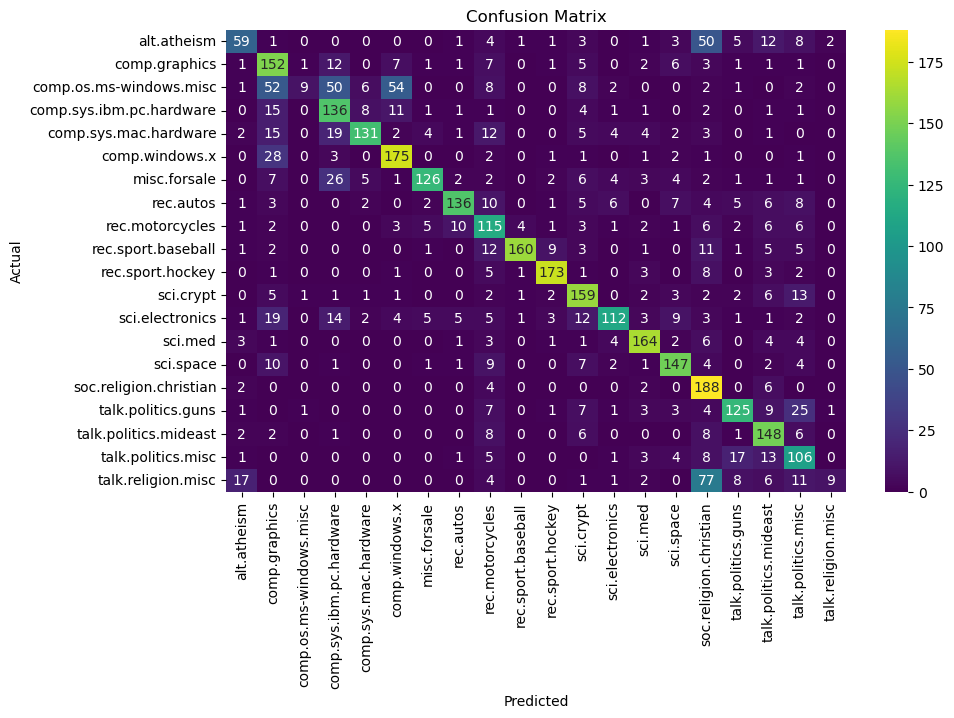

In [27]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

news = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

print("类别标签:", news.target_names)
print("数据集描述（截断）:", news.DESCR[:400], "...")
print("数据样本（截断）:")
for i in range(3): 
    print(f"样本 {i+1}: {news.data[i][:100].strip()}...")

print('-----------评估指标-------------')

# 将文本数据转换为词袋模型
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news.data)
y = news.target
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 创建、训练朴素贝叶斯分类器
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
# 预测
y_pred = nb_clf.predict(X_test)
# 评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=news.target_names, yticklabels=news.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 聚类分析

聚类是一种无监督学习的方法，旨在将数据集中的样本分组（或簇）成相似的集合，使得同一组内的样本相互之间更相似，而不同组之间的样本更不相似。

聚类是发现数据内在结构的一种方法，它能够帮助我们理解数据的组织、发现隐藏的模式以及从数据中提取有用的信息。

### 题目三、以鸢尾花数据集为例 学习k-means聚类
1. 导入数据集和聚类库
2. 使用k-means聚类，将数据分为3个簇，设置随机种子为0
3. PCA 降维到2维空间后，输出可视化结果
4. 尝试先降维，再聚类，再输出可视化结果，比较两次的不同
5. 使用轮廓系数比较聚类效果
6. 绘制轮廓系数与聚类数的关系图

**轮廓系数（Silhouette Coefficient）** 是一种用于度量数据点与其自身簇内数据的相似度与与最近的相邻簇的数据点的不相似度的指标。

1. 对于每个样本，计算它与同簇内所有其他点的平均距离（称为簇内平均距离，a）。

2. 对于每个样本，计算它与最近的不同簇内所有点的平均距离（称为簇间平均距离，b）。

3. 计算轮廓系数（S）：

​![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/6f26e49d-f738-4f41-998b-75e4870829f2)

轮廓系数的取值范围在[-1, 1]之间：

- 如果 S 接近1，表示样本与自身簇内的其他样本相似度高，与其他簇内的样本不相似，聚类效果好。
- 如果 S 接近-1，表示样本与自身簇内的其他样本相似度低，与其他簇内的样本相似度高，聚类效果差。

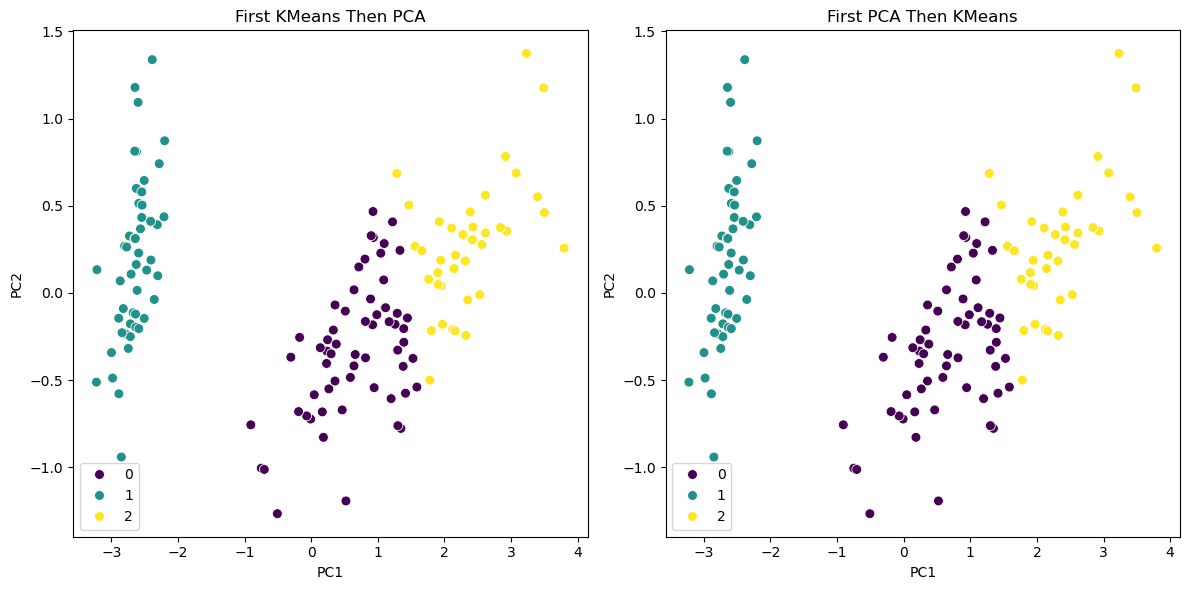

Silhouette Coefficient (KMeans Then PCA): 0.5511916046195919
Silhouette Coefficient (PCA Then KMeans): 0.5976764219547994


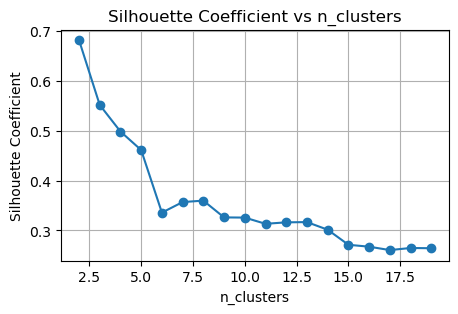

In [28]:
# 前面已加载好iris数据集；导入聚类库，PCA库，轮廓系数库
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
 
X = iris.data
y = iris.target
# k-means聚类，数据分3簇，随机种子0
kmeans = KMeans(n_clusters=3, random_state=0)
# 通过 K-Means为每个样本分配簇标签 （是一个长度为150的数组，每个元素表示对应的样本被分配到哪个簇）
cluster_labels = kmeans.fit_predict(X)

# PCA降维后，输出可视化结果
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# hue参数表示按照簇标签着色，类似于plt.scatter函数的c参数; s参数表示点的大小
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50)
plt.title('First KMeans Then PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
# 先PCA降维，再K-Means聚类
X_pca = pca.fit_transform(X)        # 重新降维(不必要的代码)
cluster_labels_pca = kmeans.fit_predict(X_pca)  # 用X_pca聚类，即先PCA降维再聚类

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_pca, palette='viridis', s=50)
plt.title('First PCA Then KMeans')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# 使用轮廓系数比较聚类效果
S_before_pca = silhouette_score(X, cluster_labels)
S_after_pca = silhouette_score(X_pca, cluster_labels_pca)
print(f'Silhouette Coefficient (KMeans Then PCA): {S_before_pca}')
print(f'Silhouette Coefficient (PCA Then KMeans): {S_after_pca}')

# 轮廓系数与聚类数的关系图 
S = []
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    s = silhouette_score(X, cluster_labels)
    S.append(s)

plt.figure(figsize=(5, 3))
plt.plot(range(2,20), S, marker='o')
plt.title('Silhouette Coefficient vs n_clusters')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

由此可见先降维后聚类，轮廓系数更大，效果更好.

对于鸢尾花数据集，总的来看，聚类数越小，轮廓系数越大，效果越好.